In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
churn_df = pd.read_csv('E:/Data/churn-bigml-80.csv', sep = ',')
churn_df_test = pd.read_csv('E:/Data/churn-bigml-20.csv', sep = ',')

In [3]:
churn_df

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,SC,79,415,No,No,0,134.7,98,22.90,189.7,68,16.12,221.4,128,9.96,11.8,5,3.19,2,False
2662,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
2663,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
2664,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False


#### Data Manipulation

In [4]:
churn_df.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

#### Data Pre-Processing

In [5]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

In [6]:
# label Encoder is used for mapping categorical data into 0, 1, 2, 3, 4...
from sklearn.preprocessing import LabelEncoder
le_encoder = LabelEncoder()

In [7]:
le_encoder.fit(churn_df['International plan'].drop_duplicates())

LabelEncoder()

In [8]:
churn_df['International plan'] = le_encoder.transform(churn_df['International plan'])
churn_df_test['International plan'] = le_encoder.transform(churn_df_test['International plan'])

In [9]:
le_encoder.fit(churn_df['Voice mail plan'].drop_duplicates())

LabelEncoder()

In [10]:
churn_df['Voice mail plan'] = le_encoder.transform(churn_df['Voice mail plan'])
churn_df_test['Voice mail plan'] = le_encoder.transform(churn_df_test['Voice mail plan'])

In [11]:
churn_df

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,SC,79,415,0,0,0,134.7,98,22.90,189.7,68,16.12,221.4,128,9.96,11.8,5,3.19,2,False
2662,AZ,192,415,0,1,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
2663,WV,68,415,0,0,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
2664,RI,28,510,0,0,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False


#### Correlation

<AxesSubplot:>

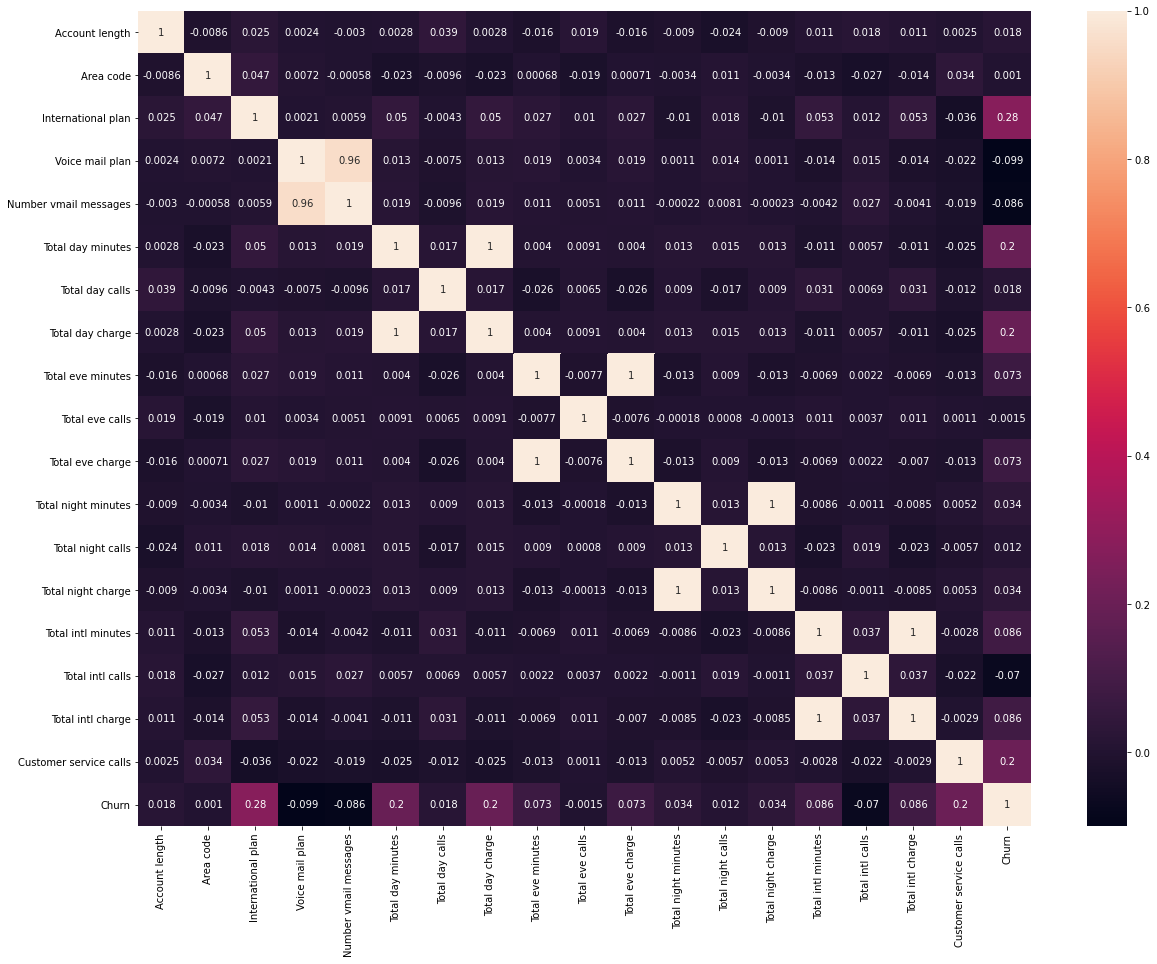

In [12]:
plt.figure(figsize = (20,15))
sns.heatmap(churn_df.corr('pearson'), annot = True)

In [13]:
churn_df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

#### Data Augmentation

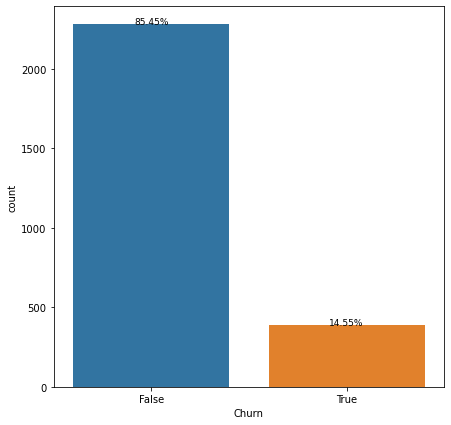

In [14]:
plt.figure(figsize=(7,7))
fig = sns.countplot(x='Churn',data=churn_df)
sizes=[]
for p in fig.patches:
    height = p.get_height()
    sizes.append(height)
    fig.text(p.get_x() + p.get_width()/2, height,
            '{:1.2f}%'.format(height/len(churn_df)*100),ha='center', fontsize=9)

In [16]:
churn_df['Churn'].value_counts()

False    2278
True      388
Name: Churn, dtype: int64

In [19]:
# resample uses "bootstrapping" method to regenerate ransom samples for each class
from sklearn.utils import resample
df_0 = churn_df[churn_df['Churn'] == False]
df_1 = churn_df[churn_df['Churn'] == True]

In [20]:
# Apply Resample
df_1_upsample = resample(df_1, n_samples = 1388, replace = True, random_state = 123)

In [21]:
churn_df1 = pd.concat([df_0 , df_1_upsample])
churn_df1

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
622,NV,69,510,1,1,33,271.5,98,46.16,253.4,102,21.54,165.4,85,7.44,8.2,2,2.21,1,True
2233,ME,62,415,1,1,32,218.4,93,37.13,236.7,132,20.12,192.2,137,8.65,13.2,3,3.56,0,True
455,NC,133,408,1,1,32,221.1,137,37.59,264.9,99,22.52,168.9,108,7.60,15.4,4,4.16,2,True
120,VT,117,408,1,0,0,167.1,86,28.41,177.5,87,15.09,249.4,132,11.22,14.1,7,3.81,2,True


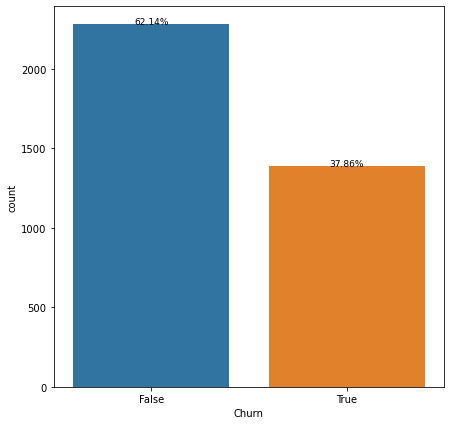

In [22]:
plt.figure(figsize=(7,7))
fig = sns.countplot(x='Churn',data=churn_df1)
sizes=[]
for p in fig.patches:
    height = p.get_height()
    sizes.append(height)
    fig.text(p.get_x() + p.get_width()/2, height,
            '{:1.2f}%'.format(height/len(churn_df1)*100),ha='center', fontsize=9)

#### Features

In [23]:
X = churn_df1.drop(['State','Number vmail messages','Total day charge','Total eve charge',
                    'Total night charge', 'Total intl minutes','Total intl calls','Churn'], axis = 1)

In [24]:
Y = churn_df1['Churn']

#### Train & Test

In [25]:
X

,Account length,Area code,International plan,Voice mail plan,Total day minutes,Total day calls,Total eve minutes,Total eve calls,Total night minutes,Total night calls,Total intl charge,Customer service calls
0,128,415,0,1,265.1,110,197.4,99,244.7,91,2.70,1
1,107,415,0,1,161.6,123,195.5,103,254.4,103,3.70,1
2,137,415,0,0,243.4,114,121.2,110,162.6,104,3.29,0
3,84,408,1,0,299.4,71,61.9,88,196.9,89,1.78,2
4,75,415,1,0,166.7,113,148.3,122,186.9,121,2.73,3
...,...,...,...,...,...,...,...,...,...,...,...,...
622,69,510,1,1,271.5,98,253.4,102,165.4,85,2.21,1
2233,62,415,1,1,218.4,93,236.7,132,192.2,137,3.56,0
455,133,408,1,1,221.1,137,264.9,99,168.9,108,4.16,2
120,117,408,1,0,167.1,86,177.5,87,249.4,132,3.81,2


In [54]:
from sklearn.model_selection import train_test_split
# Choose a random state values
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 8)

#### Decision Tree Classifier

In [55]:
from sklearn.tree import DecisionTreeClassifier
# maximum depth of decision trees is 9
clf_tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0, max_depth = 12, class_weight = {False: 0.38, True:0.62})

In [56]:
clf_tree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=12, random_state=0)

In [57]:
clf_tree.get_depth()

12

In [58]:
clf_tree.score(x_test, y_test)

0.9346049046321526

In [59]:
clf_tree.score(x_train, y_train)

0.9641882673942701

#### Plot Decision Tree

In [43]:
clf_tree

DecisionTreeClassifier(class_weight={False: 0.38, True: 0.62},
                       criterion='entropy', max_depth=12, random_state=0)

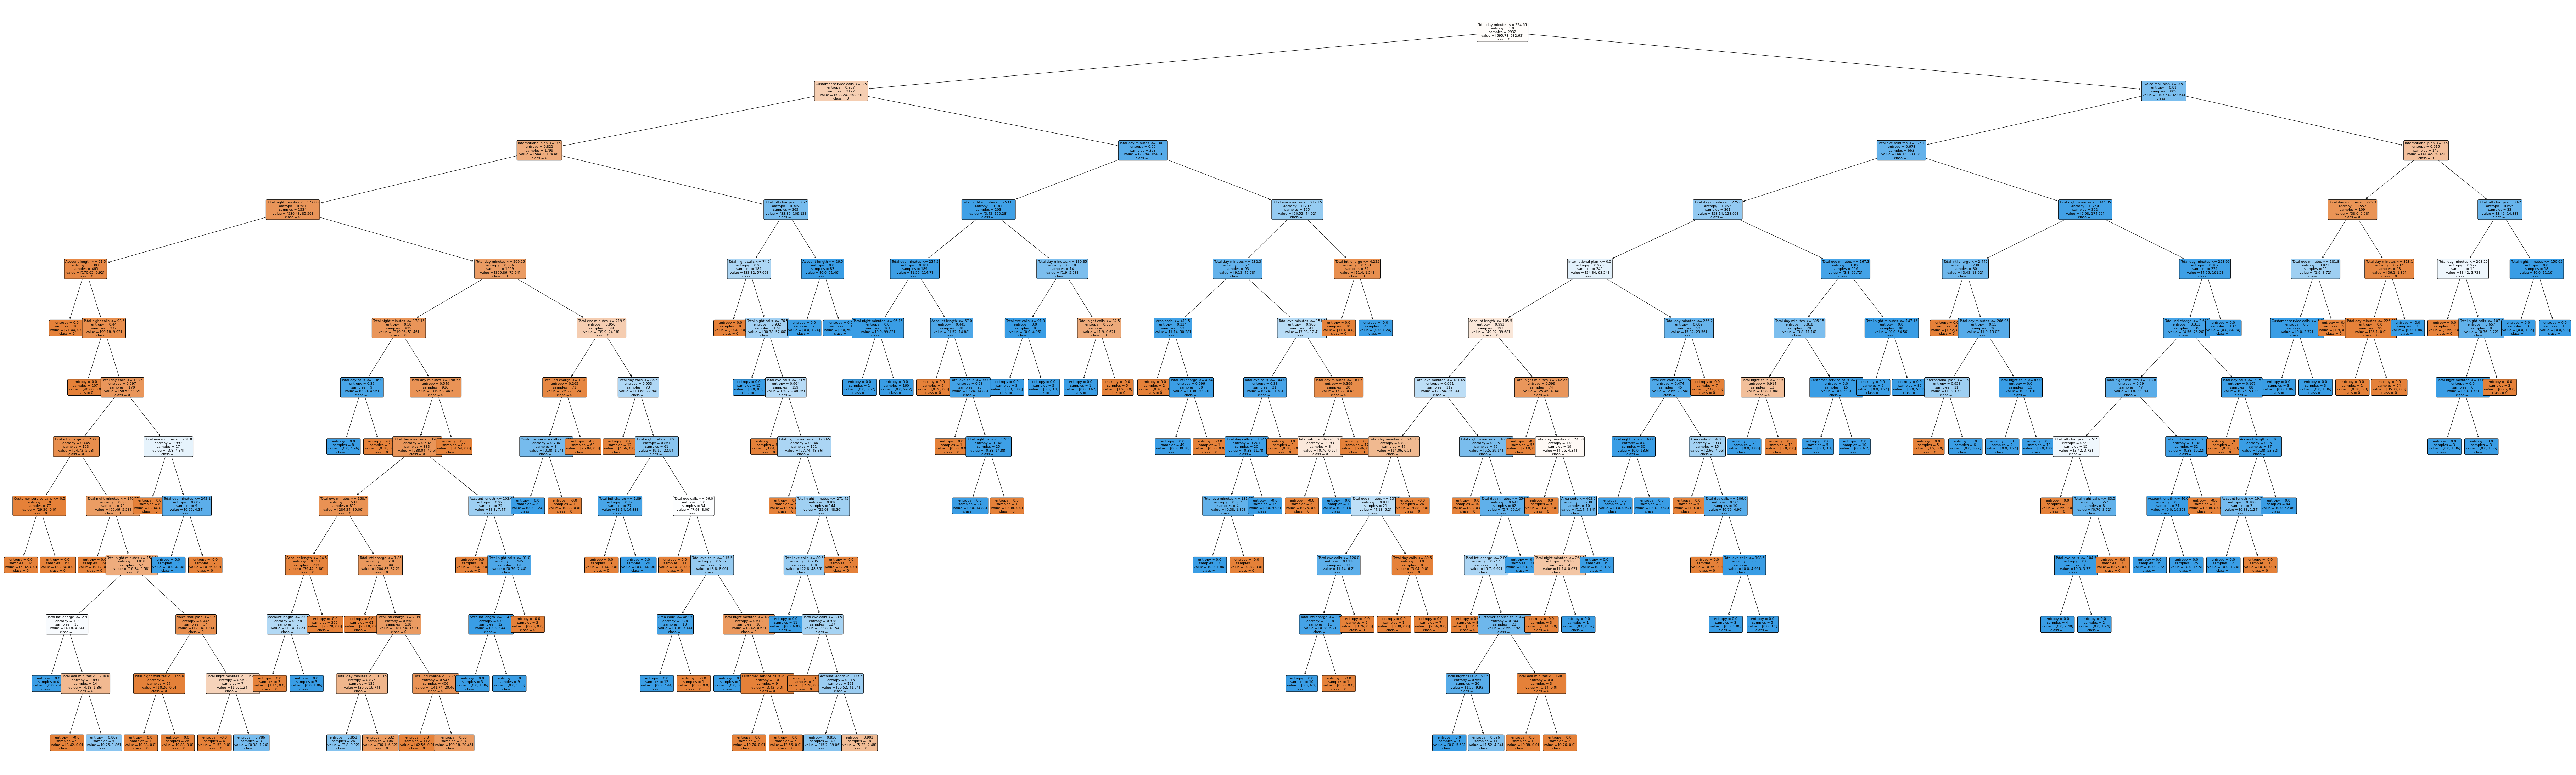

In [44]:
from sklearn import tree
fig = plt.figure(figsize=(130,40))
_ = tree.plot_tree(clf_tree, feature_names=X.columns, class_names= str(churn_df1.Churn), filled = True, rounded = True,
                  fontsize = 9.5)
plt.show()

#### Classification Metrics

In [45]:
# predicted o/p will be 1 or 0
predictions = clf_tree.predict(x_test)

In [46]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y_test, predictions)

array([[413,  34],
       [ 15, 272]], dtype=int64)

<AxesSubplot:>

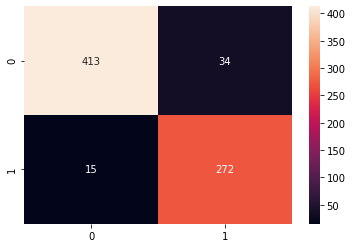

In [47]:
plt.figure(figsize = (6,4))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt = '0.0f')

In [48]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

       False       0.96      0.92      0.94       447
        True       0.89      0.95      0.92       287

    accuracy                           0.93       734
   macro avg       0.93      0.94      0.93       734
weighted avg       0.94      0.93      0.93       734



#### Ensemble Learning - Random Forest

In [55]:
from sklearn.ensemble import RandomForestClassifier
## Bootstrap = random selection of Data  for each Tree of Random Forest
#  n_estimators: number of trees
clf_rf = RandomForestClassifier(bootstrap=True, criterion='entropy', n_estimators=200)

In [57]:
clf_rf.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=200)

In [58]:
clf_rf.score(x_train, y_train)

1.0

In [59]:
clf_rf.score(x_test, y_test)

0.9863760217983651

In [60]:
predictions = clf_rf.predict(x_test)

In [61]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[438,   9],
       [  1, 286]], dtype=int64)

<AxesSubplot:>

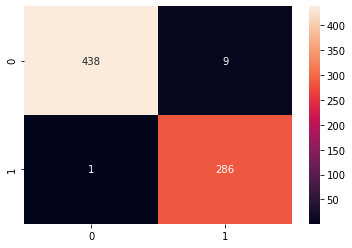

In [62]:
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt='0.0f')